In [1]:
# Carga del dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
target *= 100  # rescalar el target en k$

In [6]:
# Modelo a entrenar
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

regressor = DecisionTreeRegressor(min_samples_split=0.1)
# regressor = LinearRegression()

In [7]:
# Cálculo de errores de training y test
import pandas as pd
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(regressor, data, target,
                            cv=cv, scoring="neg_mean_absolute_error",
                            return_train_score=True, n_jobs=2)
cv_results = pd.DataFrame(cv_results)
print(cv_results)

    fit_time  score_time  test_score  train_score
0   0.131059    0.003000  -55.470441   -54.900371
1   0.132145    0.011590  -54.963775   -54.937624
2   0.202972    0.010292  -56.240197   -54.433701
3   0.187882    0.009902  -55.718620   -54.745214
4   0.141939    0.004002  -56.314335   -55.084821
5   0.138331    0.002672  -55.148900   -55.735935
6   0.162214    0.005170  -56.233488   -54.915258
7   0.153055    0.005001  -56.520932   -55.645115
8   0.174390    0.017266  -57.583800   -56.147934
9   0.199924    0.015494  -54.561349   -53.550469
10  0.165903    0.007009  -55.382874   -54.865971
11  0.186697    0.013256  -55.024094   -54.496901
12  0.181157    0.007148  -55.626858   -54.435056
13  0.149248    0.005356  -57.537221   -56.157690
14  0.163315    0.005004  -56.022962   -54.942158
15  0.183579    0.007567  -55.762472   -54.685812
16  0.136812    0.011097  -56.160017   -56.140765
17  0.157033    0.017457  -55.882263   -54.533644
18  0.189920    0.008632  -56.841824   -54.522737


In [4]:
# La validación cruzada utiliza el error absoluto medio negativo. 
# Transformamos el error absoluto medio negativo en un error absoluto medio positivo.

scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]]

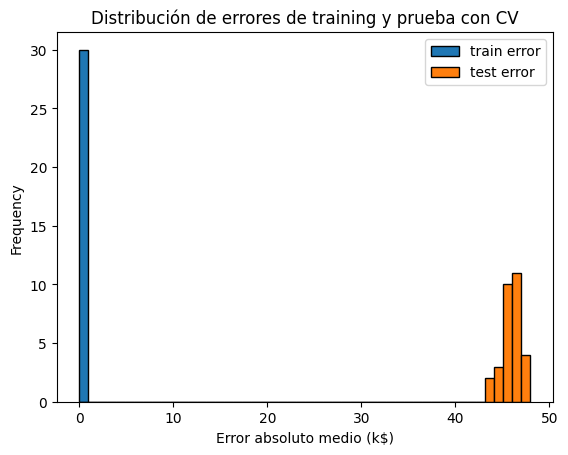

In [5]:
import matplotlib.pyplot as plt

scores.plot.hist(bins=50, edgecolor="black")
plt.xlabel("Error absoluto medio (k$)")
_ = plt.title("Distribución de errores de training y prueba con CV")

Obtenemos información sobre si nuestro modelo se ajusta demasiado (**over-fitting**), se ajusta mal(**under-fitting**), o ambos.

El **error de training es prácticamente cero**, lo que significa que el modelo NO hace under-fitting (es suficientemente flexible como para capturar cualquier variación presente en el conjunto de entrenamiento).

El **error de prueba significativamente mayor** nos dice que el modelo se ajusta demasiado: ha memorizado muchas variaciones del conjunto de entrenamiento y **no generalizan** para hacer una buena predicción en el conjunto de prueba.

### Cómo evitar el under-fitting:
- Más datos. Aumentará el error de entrenamiento. Por tanto, deberíamos generar más features (expande el espacio de hipótesis). 

- Más features.

### Cómo prevenir el over-fitting
- Cross-Validation (5 fold)
- Early Stopping (una forma de regularización)
- Pruning (poda de nodos con poco poder predictivo)
- Regularización
- Eliminar features irrelevantes.
- Entrenar con más datos
- Ensembles (conjuntos: bagging o boosting)